3-QUBIT RING XY MIXER (QAOA)
Creating 3-qubit ring XY mixer with β parameter...
Implements: exp(-iβH_XY)
where H_XY = -[(X₀X₁ + Y₀Y₁) + (X₁X₂ + Y₁Y₂) + (X₂X₀ + Y₂Y₀)]
Ring topology: 0-1-2-0 (closed loop)


findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberati

✓ Saved circuit as '3qubit_ring_xy_mixer.png' (Method 1)


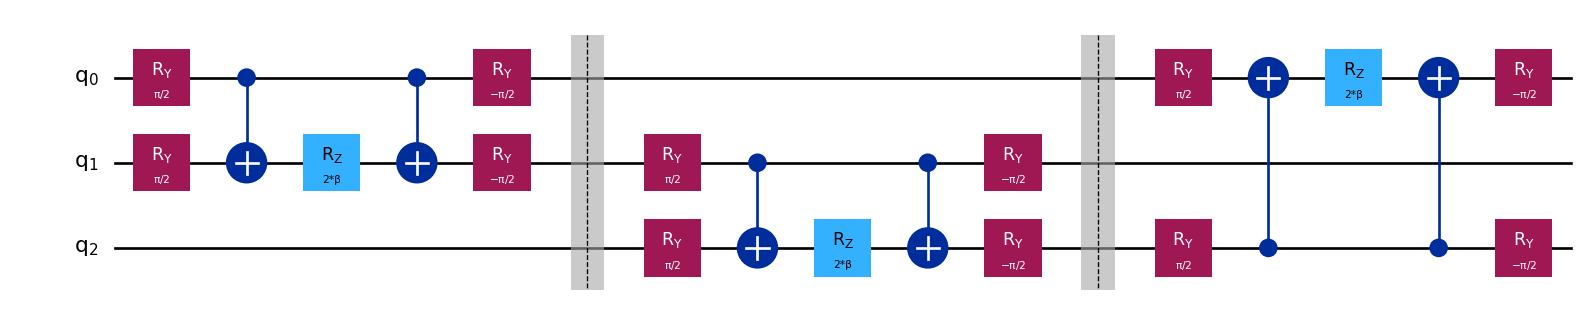


Circuit text representation:
     ┌─────────┐                     ┌──────────┐ ░                            »
q_0: ┤ Ry(π/2) ├──■───────────────■──┤ Ry(-π/2) ├─░────────────────────────────»
     ├─────────┤┌─┴─┐┌─────────┐┌─┴─┐├──────────┤ ░ ┌─────────┐                »
q_1: ┤ Ry(π/2) ├┤ X ├┤ Rz(2*β) ├┤ X ├┤ Ry(-π/2) ├─░─┤ Ry(π/2) ├──■─────────────»
     └─────────┘└───┘└─────────┘└───┘└──────────┘ ░ ├─────────┤┌─┴─┐┌─────────┐»
q_2: ─────────────────────────────────────────────░─┤ Ry(π/2) ├┤ X ├┤ Rz(2*β) ├»
                                                  ░ └─────────┘└───┘└─────────┘»
«                       ░ ┌─────────┐┌───┐┌─────────┐┌───┐┌──────────┐
«q_0: ──────────────────░─┤ Ry(π/2) ├┤ X ├┤ Rz(2*β) ├┤ X ├┤ Ry(-π/2) ├
«          ┌──────────┐ ░ └─────────┘└─┬─┘└─────────┘└─┬─┘└──────────┘
«q_1: ──■──┤ Ry(-π/2) ├─░──────────────┼───────────────┼──────────────
«     ┌─┴─┐├──────────┤ ░ ┌─────────┐  │               │  ┌──────────┐
«q_2: ┤ X ├┤ Ry(-π/2) ├─░─┤ Ry(π/2) ├──■────────

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer
from qiskit.circuit import Parameter

# Fix font warnings
plt.rcParams['font.family'] = ['DejaVu Sans', 'Liberation Sans', 'Arial', 'sans-serif']
plt.rcParams['mathtext.default'] = 'regular'

def create_3qubit_ring_xy_mixer(beta=np.pi/8):
    """Create the 3-qubit ring XY mixer circuit with QAOA parameter beta."""
    
    qc = QuantumCircuit(3, name='3Q_Ring_XY_Mixer')
    
    # Create symbolic parameter for display
    beta_param = Parameter('β')
    
    # XY interaction (0,1) - First edge of ring
    qc.ry(np.pi/2, 0)       # Rotate qubit 0 to X-Y plane
    qc.ry(np.pi/2, 1)       # Rotate qubit 1 to X-Y plane
    qc.cx(0, 1)             # First CNOT
    qc.rz(2*beta_param, 1)  # Z-rotation with symbolic 2β parameter
    qc.cx(0, 1)             # Second CNOT
    qc.ry(-np.pi/2, 0)      # Rotate qubit 0 back
    qc.ry(-np.pi/2, 1)      # Rotate qubit 1 back
    
    qc.barrier()  # Visual separator
    
    # XY interaction (1,2) - Second edge of ring
    qc.ry(np.pi/2, 1)       # Rotate qubit 1 to X-Y plane
    qc.ry(np.pi/2, 2)       # Rotate qubit 2 to X-Y plane
    qc.cx(1, 2)             # First CNOT
    qc.rz(2*beta_param, 2)  # Z-rotation with symbolic 2β parameter
    qc.cx(1, 2)             # Second CNOT
    qc.ry(-np.pi/2, 1)      # Rotate qubit 1 back
    qc.ry(-np.pi/2, 2)      # Rotate qubit 2 back
    
    qc.barrier()  # Visual separator
    
    # XY interaction (2,0) - Third edge closes the ring!  
    qc.ry(np.pi/2, 2)       # Rotate qubit 2 to X-Y plane
    qc.ry(np.pi/2, 0)       # Rotate qubit 0 to X-Y plane
    qc.cx(2, 0)             # First CNOT
    qc.rz(2*beta_param, 0)  # Z-rotation with symbolic 2β parameter
    qc.cx(2, 0)             # Second CNOT
    qc.ry(-np.pi/2, 2)      # Rotate qubit 2 back
    qc.ry(-np.pi/2, 0)      # Rotate qubit 0 back
    
    # For simulation, we need to bind the parameter to actual values
    try:
        # Try assign_parameters method
        qc_bound = qc.assign_parameters({beta_param: beta})
    except AttributeError:
        # Fallback: create a separate numerical circuit
        qc_bound = QuantumCircuit(3, name='3Q_Ring_XY_Mixer_Bound')
        
        # XY interaction (0,1)
        qc_bound.ry(np.pi/2, 0)
        qc_bound.ry(np.pi/2, 1)
        qc_bound.cx(0, 1)
        qc_bound.rz(2*beta, 1)  # Use numerical value
        qc_bound.cx(0, 1)
        qc_bound.ry(-np.pi/2, 0)
        qc_bound.ry(-np.pi/2, 1)
        
        qc_bound.barrier()
        
        # XY interaction (1,2)
        qc_bound.ry(np.pi/2, 1)
        qc_bound.ry(np.pi/2, 2)
        qc_bound.cx(1, 2)
        qc_bound.rz(2*beta, 2)  # Use numerical value
        qc_bound.cx(1, 2)
        qc_bound.ry(-np.pi/2, 1)
        qc_bound.ry(-np.pi/2, 2)
        
        qc_bound.barrier()
        
        # XY interaction (2,0) - closes the ring
        qc_bound.ry(np.pi/2, 2)
        qc_bound.ry(np.pi/2, 0)
        qc_bound.cx(2, 0)
        qc_bound.rz(2*beta, 0)  # Use numerical value
        qc_bound.cx(2, 0)
        qc_bound.ry(-np.pi/2, 2)
        qc_bound.ry(-np.pi/2, 0)
    
    return qc, qc_bound

def plot_3qubit_ring_xy_mixer():
    """Plot the 3-qubit ring XY mixer circuit."""
    
    qc_symbolic, qc_bound = create_3qubit_ring_xy_mixer()
    
    # Use symbolic circuit for display (shows 2β)
    try:
        # Method 1: Direct matplotlib circuit drawing
        fig, ax = plt.subplots(figsize=(16, 6))
        qc_symbolic.draw(output='mpl', ax=ax, style='default', fold=None, scale=1.0)
        
        plt.tight_layout()
        plt.savefig('3qubit_ring_xy_mixer.png', dpi=600, bbox_inches='tight', 
                    facecolor='white', edgecolor='none')
        
        print("✓ Saved circuit as '3qubit_ring_xy_mixer.png' (Method 1)")
        plt.show()
        
    except Exception as e:
        print(f"Method 1 failed: {e}")
        
        # Method 2: Use circuit_drawer but handle differently
        try:
            plt.figure(figsize=(16, 6))
            fig = circuit_drawer(qc_symbolic, output='mpl', style='default', fold=None, scale=1.0)
            
            if fig is not None:
                plt.savefig('3qubit_ring_xy_mixer.png', dpi=600, bbox_inches='tight', 
                            facecolor='white', edgecolor='none')
                print("✓ Saved circuit as '3qubit_ring_xy_mixer.png' (Method 2)")
                plt.show()
            else:
                print("Circuit drawer returned None")
                
        except Exception as e2:
            print(f"Method 2 also failed: {e2}")
            print("Falling back to text-only representation")
    
    # Always show text representation
    print("\nCircuit text representation:")
    print(qc_symbolic.draw(output='text'))
    
    return qc_symbolic, qc_bound

def demonstrate_3qubit_ring_xy_effect():
    """Demonstrate what the 3-qubit ring XY mixer does to different input states."""
    
    try:
        # Try newer Qiskit first
        from qiskit_aer import Aer
        from qiskit import transpile
        use_aer = True
    except ImportError:
        try:
            # Try older Qiskit
            from qiskit import Aer
            from qiskit import transpile
            use_aer = True
        except ImportError:
            # Fall back to basic quantum_info
            from qiskit.quantum_info import Statevector
            use_aer = False
    
    print("\n3-Qubit Ring XY Mixer Effect on Different States:")
    print("="*50)
    print("Using β = π/6 for demonstration (smaller for clearer effect)")
    print("(In QAOA, β is optimized along with γ parameters)")
    print()
    
    # Test on states that should show XY exchange
    test_states = ['001', '010', '100', '110']
    
    for initial_state in test_states:
        # Create circuit with initial state
        qc = QuantumCircuit(3)
        
        # Prepare initial state
        for i, bit in enumerate(initial_state):
            if bit == '1':
                qc.x(i)
        
        # Add 3-qubit ring XY mixer (use bound circuit for simulation)
        _, xy_mixer_bound = create_3qubit_ring_xy_mixer(beta=np.pi/6)  # π/6 for clearer demo
        qc = qc.compose(xy_mixer_bound)
        
        if use_aer:
            # Use Aer backend
            backend = Aer.get_backend('statevector_simulator')
            transpiled_qc = transpile(qc, backend)
            job = backend.run(transpiled_qc)
            result = job.result()
            statevector = result.get_statevector()
        else:
            # Use quantum_info Statevector
            statevector = Statevector.from_instruction(qc)
        
        print(f"\nInitial state |{initial_state}⟩:")
        
        # Display final state probabilities
        probs = np.abs(statevector)**2
        states = ['|000⟩', '|001⟩', '|010⟩', '|011⟩', '|100⟩', '|101⟩', '|110⟩', '|111⟩']
        
        for i, (state, prob) in enumerate(zip(states, probs)):
            if prob > 0.001:
                print(f"  {state}: {prob:.3f}")

def compare_3qubit_topologies():
    """Compare all three 3-qubit topology options."""
    
    print("\n3-QUBIT TOPOLOGY COMPARISON:")
    print("="*50)
    
    print("1. CHAIN TOPOLOGY (0-1-2):")
    print("   Interactions: (0,1), (1,2)")
    print("   Exchange paths: 0↔1↔2 (sequential only)")
    print("   Example: |001⟩ → |010⟩ → |100⟩ (2 hops)")
    print()
    
    print("2. RING TOPOLOGY (0-1-2-0):")
    print("   Interactions: (0,1), (1,2), (2,0)")
    print("   Exchange paths: Multiple routes around ring")
    print("   Example: |001⟩ → |100⟩ via two paths:")
    print("            Path A: |001⟩ → |010⟩ → |100⟩ (2 hops)")
    print("            Path B: |001⟩ → |100⟩ (1 hop via (2,0))")
    print()
    
    print("3. ALL-TO-ALL TOPOLOGY:")
    print("   Interactions: (0,1), (0,2), (1,2)")
    print("   Exchange paths: Direct connection between all pairs")
    print("   Example: |001⟩ → |100⟩ directly via (0,2)")
    print()
    
    print("KEY INSIGHTS:")
    print("• Ring: Balanced connectivity, good for physical systems")
    print("• All-to-All: Maximum mixing, best for optimization")
    print("• Chain: Simplest, good for 1D problems")
    print("• All have 3 interactions but different connectivity patterns!")

def main():
    """Generate and demonstrate the 3-qubit ring XY mixer."""
    
    print("3-QUBIT RING XY MIXER (QAOA)")
    print("="*40)
    print("Creating 3-qubit ring XY mixer with β parameter...")
    print("Implements: exp(-iβH_XY)")
    print("where H_XY = -[(X₀X₁ + Y₀Y₁) + (X₁X₂ + Y₁Y₂) + (X₂X₀ + Y₂Y₀)]")
    print("Ring topology: 0-1-2-0 (closed loop)")
    print()
    
    # Plot the circuit
    qc_symbolic, qc_bound = plot_3qubit_ring_xy_mixer()
    
    # Demonstrate the effect
    demonstrate_3qubit_ring_xy_effect()
    
    # Compare all topologies
    compare_3qubit_topologies()
    
    print("\n" + "="*40)
    print("RING QAOA MIXER CONCEPT:")
    print("✓ XY mixer creates circular exchange pattern: 0↔1↔2↔0")
    print("✓ Three XY interactions: (0,1), (1,2), and (2,0)")
    print("✓ β (beta) parameter controls mixing strength")
    print("✓ Multiple paths for state exchange (flexibility)")
    print("✓ Hardware friendly: matches many device topologies")
    print("✓ Balanced: each qubit has exactly 2 neighbors")
    print("✓ In QAOA: alternates with cost Hamiltonian (γ parameter)")

if __name__ == "__main__":
    main()

In [5]:
qc1, qc2 = create_3qubit_ring_xy_mixer(1)

In [9]:
from qiskit.quantum_info import Operator

In [11]:
Operator(qc2).to_matrix().round(3)

array([[ 0.158+0.596j,  0.   +0.j   ,  0.   +0.j   , -0.383-0.246j,
         0.   +0.j   , -0.383-0.246j, -0.383-0.246j, -0.   -0.j   ],
       [ 0.   +0.j   ,  0.158+0.596j, -0.383-0.246j,  0.   +0.j   ,
        -0.383-0.246j, -0.   +0.j   ,  0.   -0.j   , -0.383-0.246j],
       [ 0.   +0.j   , -0.383-0.246j,  0.158+0.596j,  0.   +0.j   ,
        -0.383-0.246j, -0.   -0.j   ,  0.   +0.j   , -0.383-0.246j],
       [-0.383-0.246j,  0.   -0.j   ,  0.   -0.j   ,  0.158+0.596j,
         0.   +0.j   , -0.383-0.246j, -0.383-0.246j, -0.   -0.j   ],
       [ 0.   +0.j   , -0.383-0.246j, -0.383-0.246j,  0.   -0.j   ,
         0.158+0.596j,  0.   +0.j   ,  0.   +0.j   , -0.383-0.246j],
       [-0.383-0.246j, -0.   -0.j   ,  0.   +0.j   , -0.383-0.246j,
         0.   -0.j   ,  0.158+0.596j, -0.383-0.246j, -0.   -0.j   ],
       [-0.383-0.246j,  0.   +0.j   ,  0.   -0.j   , -0.383-0.246j,
         0.   -0.j   , -0.383-0.246j,  0.158+0.596j, -0.   -0.j   ],
       [ 0.   +0.j   , -0.383-0.246j, -0.

In [19]:
from qiskit.circuit.library import XXMinusYYGate
from qiskit.circuit import Parameter

findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.


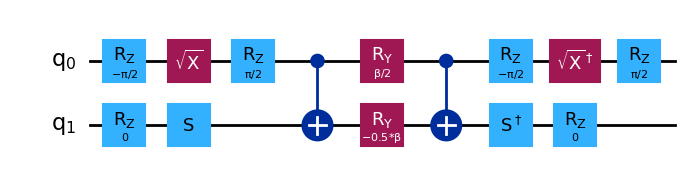

In [23]:
XXMinusYYGate(Parameter(r"$\beta$")).decompositions[0].draw("mpl")